In [7]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import openpyxl
pd.set_option('display.max_rows', 6500)
import numpy as np

In [8]:
def collect_data():
    num_of_pages = 703
    df_all = pd.DataFrame()
    for pg_num in range(0, num_of_pages):
        print (pg_num)
        url = 'https://koronavirus.gov.hu/elhunytak?page={}'.format(str(pg_num))
        req = requests.get(url)
        soup = BeautifulSoup(req.content)
        
        sorszam = soup.find_all("td", {"class": "views-field views-field-field-elhunytak-sorszam"})
        nem = soup.find_all("td", {"class": "views-field views-field-field-elhunytak-nem"})
        kor = soup.find_all("td", {"class": "views-field views-field-field-elhunytak-kor"})
        betegsegek = soup.find_all("td", {"class": "views-field views-field-field-elhunytak-alapbetegsegek"})
        
        sorszam_list = [int(i.text.replace('\n', '').replace( '          ', '').replace('        ', '')) for i in sorszam]
        nem_list = [i.text.replace('\n', '').replace( '          ', '').replace('        ', '') for i in nem]
        kor_list = [int(i.text.replace('\n', '').replace( '          ', '').replace('        ', '')) for i in kor]
        betegsegek_list = [i.text.replace('\n', '').replace( '          ', '').replace('        ', '') for i in betegsegek]
        
        df = pd.DataFrame({'sorszám': sorszam_list, 'nem': nem_list, 
                   'kor': kor_list, 'betegségek': betegsegek_list})
        df_all = df_all.append(df, ignore_index=True)
    df_all = df_all.sort_values('sorszám').reset_index(drop=True)
    df_all.to_excel('df_covid_hu_all.xlsx', index=False)
        

In [9]:
df_all = pd.read_excel('df_covid_hu_all.xlsx')

In [11]:
df_all.groupby('nem').count()

,sorszám,kor,betegségek
nem,,,
Férfi,6989,6989,6989
Nõ,4939,4939,4939
Nő,1707,1707,1707
férfi,10951,10951,10951
nõ,10536,10536,10536


<AxesSubplot:ylabel='Frequency'>

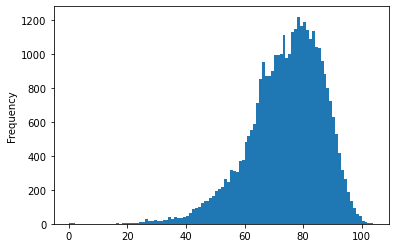

In [113]:
df_all['kor'].plot(kind='hist', bins=df_all['kor'].max())

In [116]:
df_bet = df_all.copy()

In [117]:
df_bet['betegségek'] = df_all['betegségek'].apply(lambda x: x.split(','))
df_bet = df_bet.explode('betegségek')

In [131]:
df_bet.groupby('betegségek').count()[['sorszám']].sort_values(by='sorszám', ascending=False)

,sorszám
betegségek,
magasvérnyomás-betegség,9942
cukorbetegség,7202
magas vérnyomás,5934
magasvérnyomás-betegség,3850
iszkémiás szívbetegség,2693
cukorbetegség,2534
magas vérnyomás,2364
szívbetegség,2084
demencia,1709


In [6]:
df_bet.groupby('betegségek').count()[['sorszám']].sort_values(by='betegségek')

NameError: name 'df_bet' is not defined